In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize and scale to 0-1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert to grayscale
x_train_gray = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])
x_test_gray = np.dot(x_test[...,:3], [0.2989, 0.5870, 0.1140])

# Reshape grayscale to have 1 channel
x_train_gray = x_train_gray.reshape((x_train_gray.shape[0], 32, 32, 1))
x_test_gray = x_test_gray.reshape((x_test_gray.shape[0], 32, 32, 1))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
input_img = Input(shape=(32, 32, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Output: 3 color channels (RGB)
output_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,075 (293.26 KB)

 Trainable params: 75,075 (293.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(x_train_gray, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_gray, x_test))


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 251s 636ms/step - loss: 0.0234 - val_loss: 0.0108
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 265s 645ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 262s 645ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 258s 634ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 618ms/step - loss: 0.0087 - val_loss: 0.0084
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 252s 645ms/step - loss: 0.0084 - val_loss: 0.0080
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 258s 634ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 254s 614ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 617ms/step - loss: 0.0078 - val_loss: 0.0076
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 264s 623ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 263s 626ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 12

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step


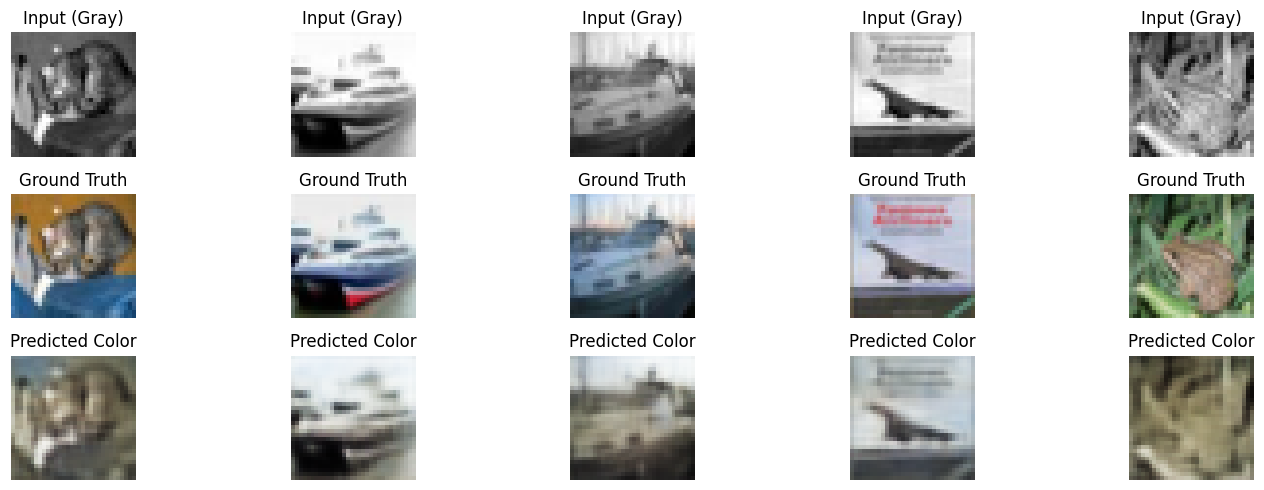

In [ ]:
# Predict color images from grayscale test images
preds = autoencoder.predict(x_test_gray)

# Show some results
n = 5
plt.figure(figsize=(15, 5))

for i in range(n):
    # Grayscale Input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    plt.title("Input (Gray)")
    plt.axis('off')

    # Ground Truth
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i])
    plt.title("Ground Truth")
    plt.axis('off')

    # Predicted Color
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(preds[i])
    plt.title("Predicted Color")
    plt.axis('off')

plt.tight_layout()
plt.show()
